# PH3022 - Machine Learning and Neural Computation - Assignment_10

# Q1

# Q1.a

<b>Definition:</b> 
- A Gaussian Mixture Model(GMM) is a probabilistic model that assumes all data points are generated from a mixture of a finite number of Gaussian distributions (also known as Normal distributions) with unknown parameters.
- Key Components:
    - Means ($\mu$): The center of each Gaussian component.
    - Covariances ($\Sigma$): The shape and spread of each component.
    - Mixing Coefficients ($\pi$): The weight or "contribution" of each Gaussian to the total distribution.

<b>Difference between K-Means clustering and Gaussian Mixture Model(GMM):</b>
<table border="1"> <tr> <th>Feature</th> <th>K-Means Clustering</th> <th>Gaussian Mixture Model (GMM)</th> </tr> <tr> <td><strong>Clustering Type</strong></td> <td><strong>Hard Clustering:</strong> Each point belongs to exactly one cluster.</td> <td><strong>Soft Clustering:</strong> Each point has a probability of belonging to each cluster.</td> </tr> <tr> <td><strong>Cluster Shape</strong></td> <td>Limited to <strong>circular/spherical</strong> clusters.</td> <td>Flexible; can handle <strong>elliptical</strong> clusters due to covariance.</td> </tr> <tr> <td><strong>Parameters</strong></td> <td>Uses cluster centers (means).</td> <td>Uses means, covariances, and mixing coefficients.</td> </tr> <tr> <td><strong>Overlap</strong></td> <td>Does not handle overlapping groups well.</td> <td>Excellent at identifying and modeling <strong>overlapping patterns</strong>.</td> </tr> </table>

# Q1.b

<b>Expectation-Maximization(EM) Steps:</b>

The EM algorithm is an iterative process used to find the maximum likelihood estimates of the GMM parameters.
- Expectation (E-step): Calculate the "responsibility" that each Gaussian component $k$ takes for each data point $x_i$ based on current parameters.
- Maximization (M-step): Update the parameters to better fit the data:
    - Means: Updated by taking the weighted average of all data points, using the responsibilities as weights.
    - Covariances: Updated based on the spread of the data points around the new means, weighted by responsibilities.
    - Mixing Coefficients: Updated by calculating the average responsibility assigned to each component across the dataset.

# Q1.c

<b>Advantages over K-Means</b>
<table border="1"> <tr> <th>Scenario</th> <th>K-Means Clustering</th> <th>Gaussian Mixture Model (GMM)</th> </tr> <tr> <td><strong>Cluster Shape</strong></td> <td>Assumes clusters are <strong>spherical</strong> (circular).</td> <td>Can handle <strong>elliptical shapes</strong> due to the covariance parameter.</td> </tr> <tr> <td><strong>Overlapping Data</strong></td> <td>Uses hard assignments; struggles with overlap.</td> <td>Uses probabilities; handles <strong>overlapping clusters</strong> more effectively.</td> </tr> <tr> <td><strong>Cluster Size & Density</strong></td> <td>Struggles when clusters have significantly <strong>different volumes</strong>.</td> <td>Can account for clusters of <strong>different sizes and densities</strong>.</td> </tr> </table>

# Q2

# Q2.a

<b>Utilizing K-Means or GMM for Anomaly Detection</b>

Clustering algorithms detect anomalies by identifying data points that do not fit well into the established structures of the majority of the data.
- K-Means approach: Points that are located at a very large distance from their nearest cluster center (centroid) are flagged as anomalies.
- GMM approach: Since GMM is a probabilistic model, it identifies anomalies as points that fall into low-density regions where the probability of belonging to any Gaussian component is below a certain threshold.

# Q2.b

<b>Role of Clusters in Identifying Outliers</b>

Clusters act as a "profile" for normal behavior, making any deviation from these patterns easy to spot.
- Identifying Outliers: Points that do not belong to any cluster or form very small, isolated "micro-clusters" are typically identified as outliers.
- Anomalous Patterns: Clusters provide insights by showing which specific features (like high spending with low income) deviate from the standard group behavior, helping to categorize the type of anomaly detected.

# Q3

# Q3.a

# Q3.b

<b>Identify the Variables</b>

<table border="1"><tr><th>Variable Name</th><th>Data Type</th><th>Description</th></tr><tr><td><strong>CustomerID</strong></td><td>Integer</td><td>A unique numerical ID assigned to each customer. Usually dropped during clustering as it has no predictive power.</td></tr><tr><td><strong>Gender</strong></td><td>Categorical (String)</td><td>Gender of the customer (Male or Female). Requires encoding (e.g., 0 and 1) for analysis.</td></tr><tr><td><strong>Age</strong></td><td>Integer</td><td>Age of the customer in years (ranges from 18 to 70).</td></tr><tr><td><strong>Annual Income (k$)</strong></td><td>Integer</td><td>The annual earning of the customer in thousands of dollars.</td></tr><tr><td><strong>Spending Score (1-100)</strong></td><td>Integer</td><td>A score (1 to 100) assigned by the mall based on customer behavior and spending nature.</td></tr></table>

# Q3.c

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Drop CustomerID Features
df = df.drop(columns=['CustomerID'])

# Handle Categorical Data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Check for Missing Values
print("Missing values per column:")
print(df.isnull().sum())

# Feature Scaling
scaler = StandardScaler()
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the first 5 rows of the prepared data
print("\nPreprocessed Data:")
print(df.head())

Missing values per column:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Preprocessed Data:
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0       1 -1.424569           -1.738999               -0.434801
1       1 -1.281035           -1.738999                1.195704
2       0 -1.352802           -1.700830               -1.715913
3       0 -1.137502           -1.700830                1.040418
4       0 -0.563369           -1.662660               -0.395980


<b>Preprocessing Techniques used,</b>

- Drop Irrelevant Features: Remove CustomerID because it is just a label and provides no information about customer behavior.
- Handling Categorical Data: Since most clustering algorithms (like K-Means) work with numerical distances, the Gender variable should be encoded (e.g., Label Encoding: Male=0, Female=1).
- Check for Missing Values: Use "df.isnull().sum()" to ensure there are no null values (this dataset is typically clean).
- Feature Scaling: Use StandardScaler or MinMaxScaler. K-Means and GMM are sensitive to the scale of features. Scaling ensures that Annual Income (which has higher values) doesn't dominate Age.

# Q3.d

K     Silhouette Score     Inertia (WCSS)      
---------------------------------------------
2     0.3213               269.6910            


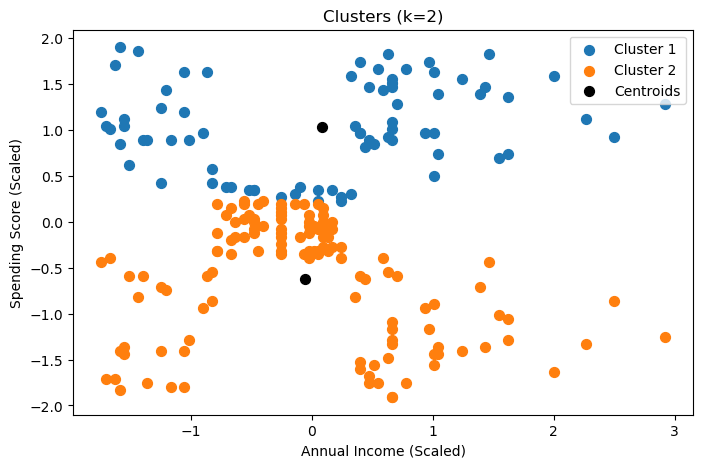

3     0.4666               157.7040            


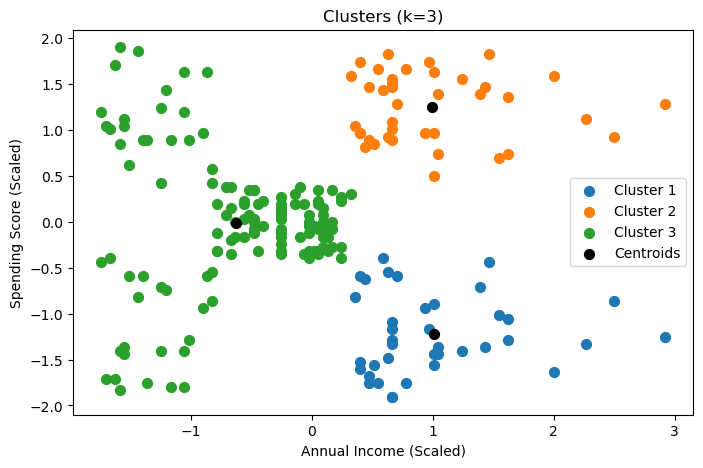

4     0.4939               108.9213            


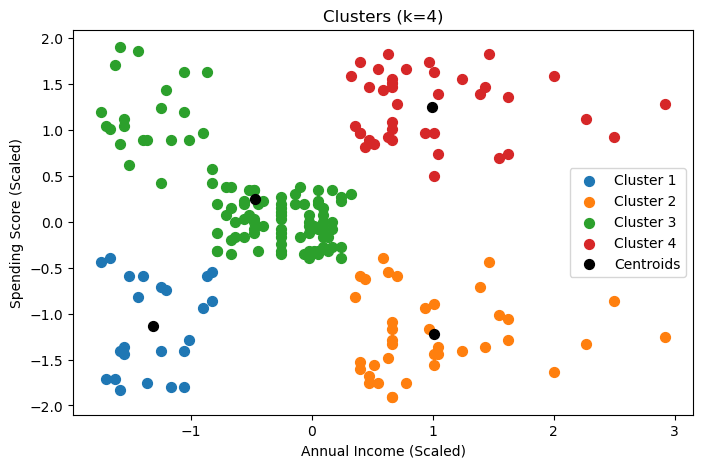

5     0.5547               65.5684             


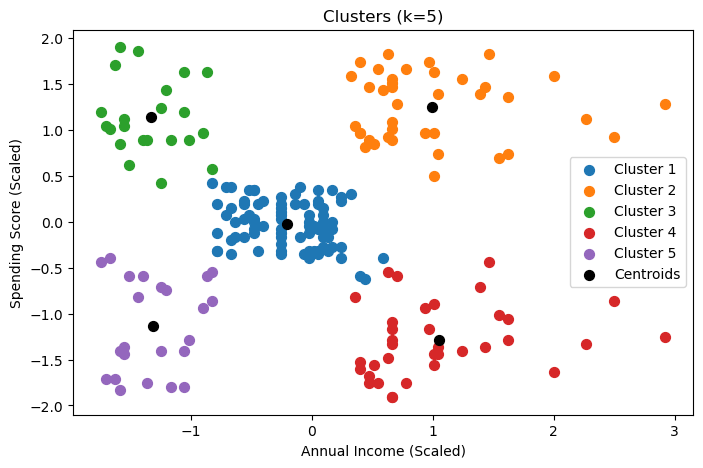

6     0.5399               55.0573             


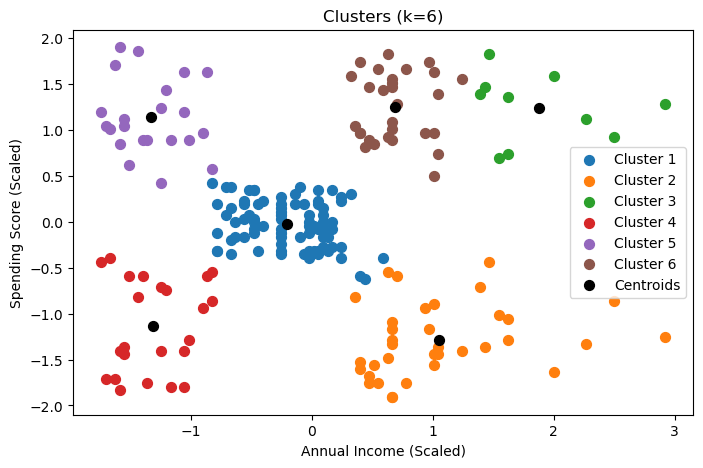

7     0.5281               44.8648             


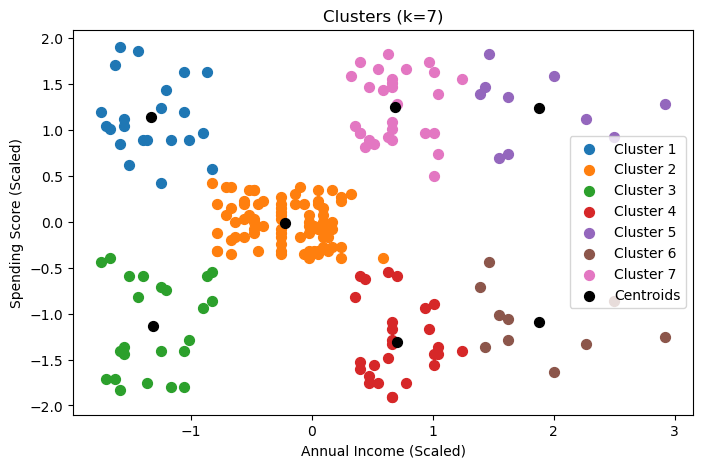

8     0.4552               37.2282             


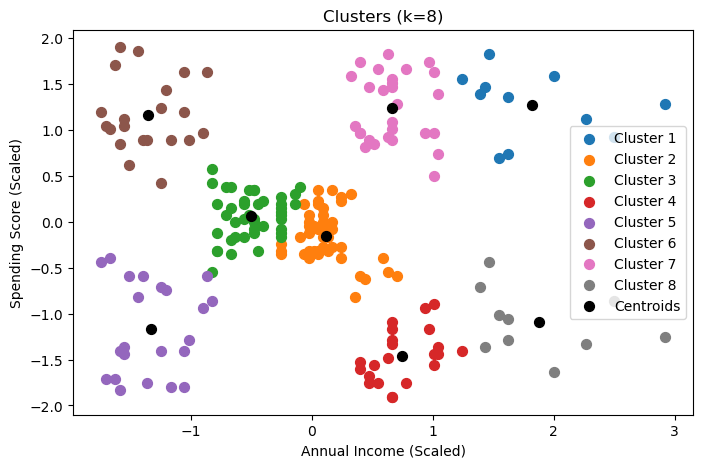

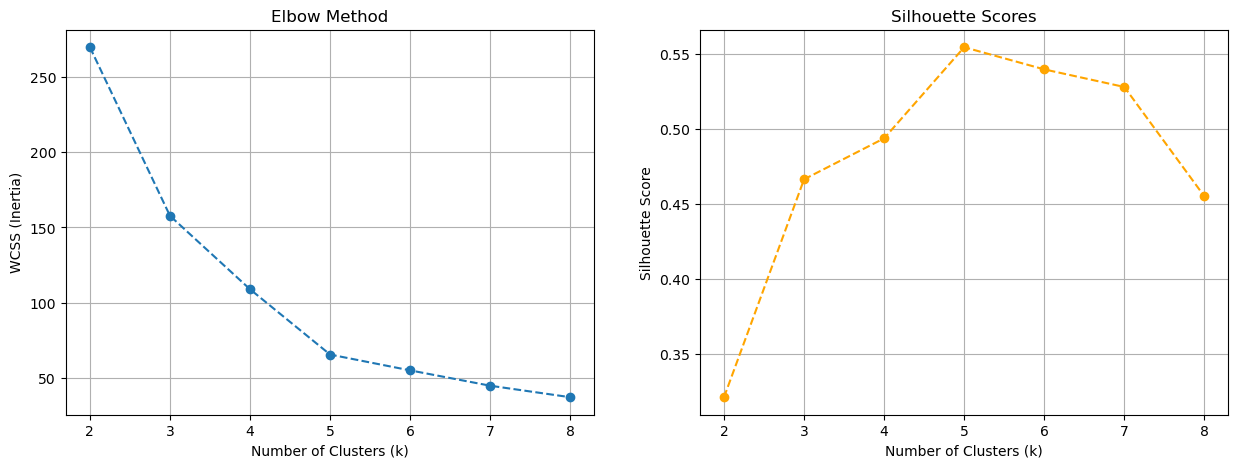


Optimum k based on Elbow Method:     5

Optimum k based on Silhouette Score: 5


In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import os

# Suppress warnings
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings('ignore')

# Select data
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

wcss = []       
sil_scores = [] 

print(f"{'K':<5} {'Silhouette Score':<20} {'Inertia (WCSS)':<20}")
print("-" * 45)

for k in range(2, 9):
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    
    # Store metrics
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, kmeans.labels_))
    
    print(f"{k:<5} {sil_scores[-1]:<20.4f} {wcss[-1]:<20.4f}")

    plt.figure(figsize=(8, 5))
    
    labels = kmeans.labels_
    for i in range(k):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, label=f'Cluster {i+1}')

    # Plot Centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=50, c='black', label='Centroids', edgecolors='black')

    plt.title(f'Clusters (k={k})')
    plt.xlabel('Annual Income (Scaled)')
    plt.ylabel('Spending Score (Scaled)')
    plt.legend()
    plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(range(2, 9), wcss, marker='o', linestyle='--')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS (Inertia)')
ax1.grid(True)

ax2.plot(range(2, 9), sil_scores, marker='o', linestyle='--', color='orange')
ax2.set_title('Silhouette Scores')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

plt.show()

print("\nOptimum k based on Elbow Method:     5")
print("\nOptimum k based on Silhouette Score: 5")

# Q3.e

K     Silhouette Score     AIC (Elbow Metric)  
---------------------------------------------
2     0.3872               1112.1910           


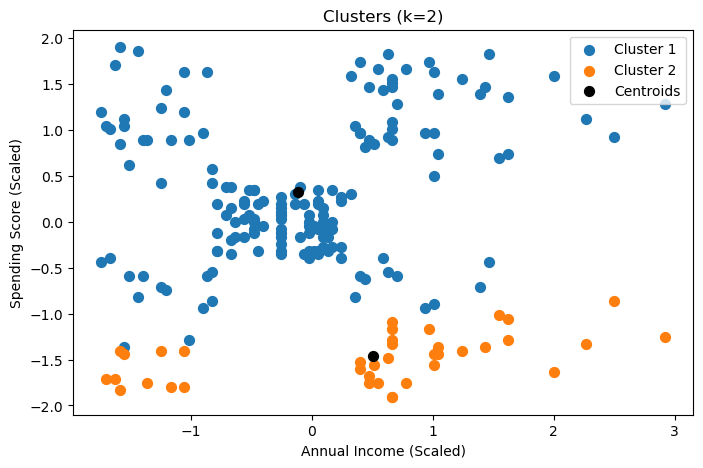

3     0.3472               1060.4301           


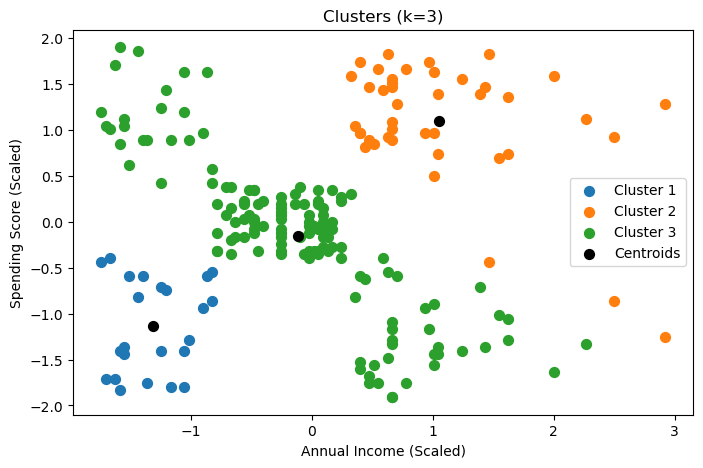

4     0.4509               1003.6327           


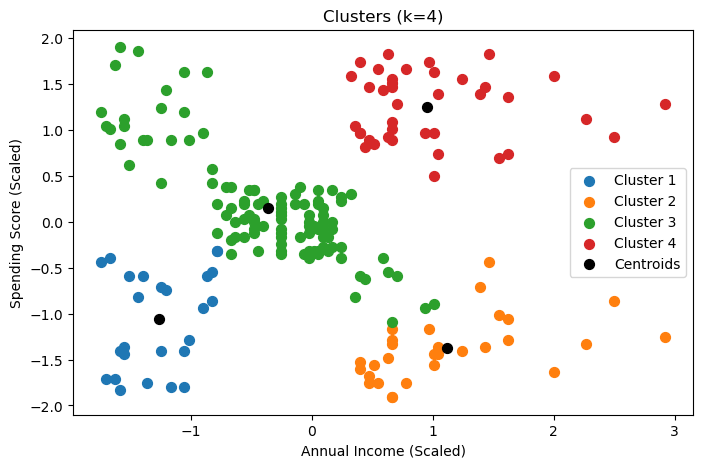

5     0.5537               963.0010            


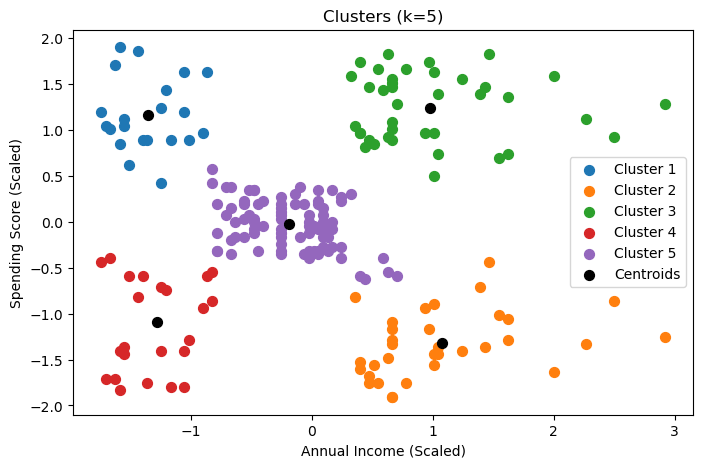

6     0.5358               956.1257            


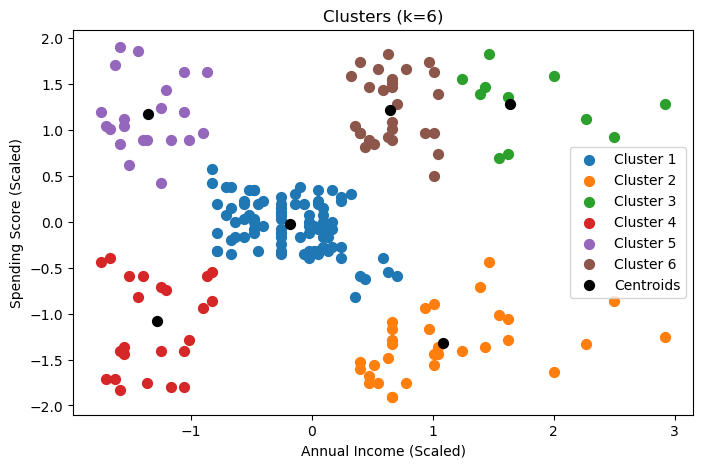

7     0.3852               950.3593            


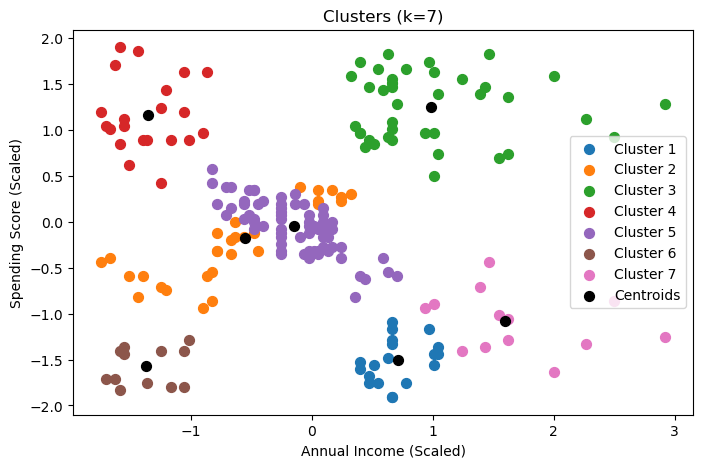

8     0.4651               927.4595            


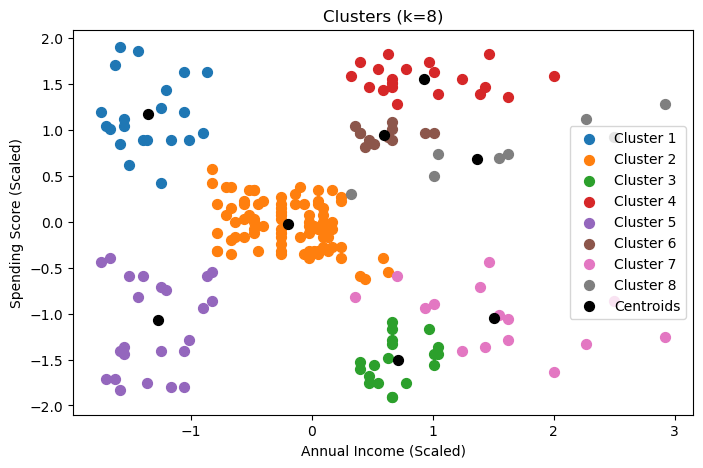

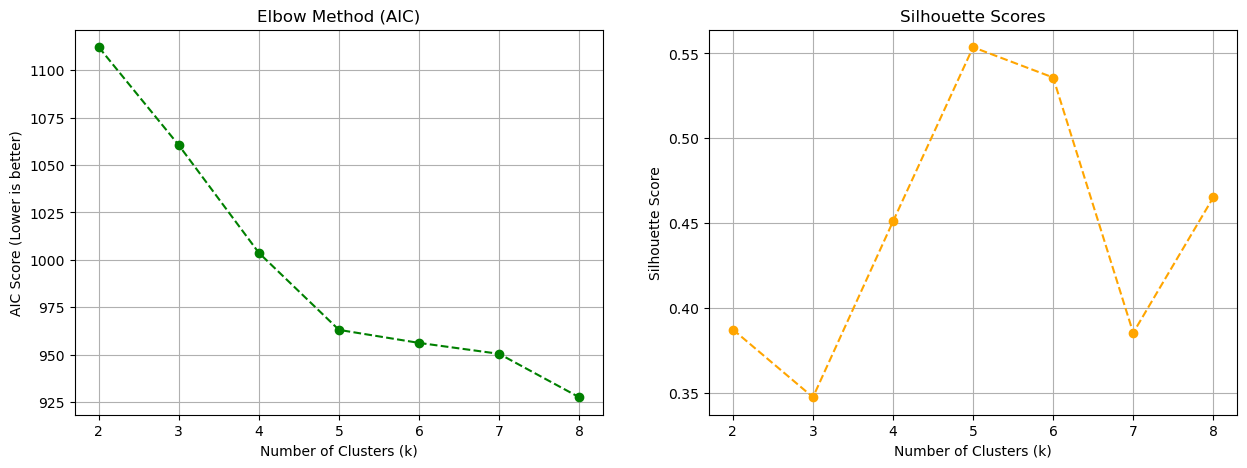


Optimum k based on Elbow Method (AIC): 5

Optimum k based on Silhouette Score:   5


In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import warnings
import os

# Suppress warnings
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings('ignore')

# Select data
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

aic_scores = [] 
sil_scores = [] 

print(f"{'K':<5} {'Silhouette Score':<20} {'AIC (Elbow Metric)':<20}")
print("-" * 45)

for k in range(2, 9):
    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=42)
    gmm.fit(X)
    
    # Predict clusters
    labels = gmm.predict(X)
    
    # Store metrics
    aic_scores.append(gmm.aic(X))
    sil_scores.append(silhouette_score(X, labels))
    
    print(f"{k:<5} {sil_scores[-1]:<20.4f} {aic_scores[-1]:<20.4f}")

    plt.figure(figsize=(8, 5))
    
    for i in range(k):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, label=f'Cluster {i+1}')

    plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], 
                s=50, c='black', label='Centroids', edgecolors='black')

    plt.title(f'Clusters (k={k})')
    plt.xlabel('Annual Income (Scaled)')
    plt.ylabel('Spending Score (Scaled)')
    plt.legend()
    plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(range(2, 9), aic_scores, marker='o', linestyle='--', color='green')
ax1.set_title('Elbow Method (AIC)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('AIC Score (Lower is better)')
ax1.grid(True)

ax2.plot(range(2, 9), sil_scores, marker='o', linestyle='--', color='orange')
ax2.set_title('Silhouette Scores')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

plt.show()

print("\nOptimum k based on Elbow Method (AIC): 5")
print("\nOptimum k based on Silhouette Score:   5")

# Q4

- Clusters 0, 1, and 2 correspond to these three species.
- Setosa is typically the easiest to separate because its petal size is much smaller than the others.
- Versicolor and Virginica are more similar and often have some overlap, which is why the clustering accuracy (NMI score) is usually around 0.75-0.90 rather than a perfect 1.0.

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

K-Means:
Normalized Mutual Information Score: 0.7582

GMM:
Normalized Mutual Information Score: 0.8997


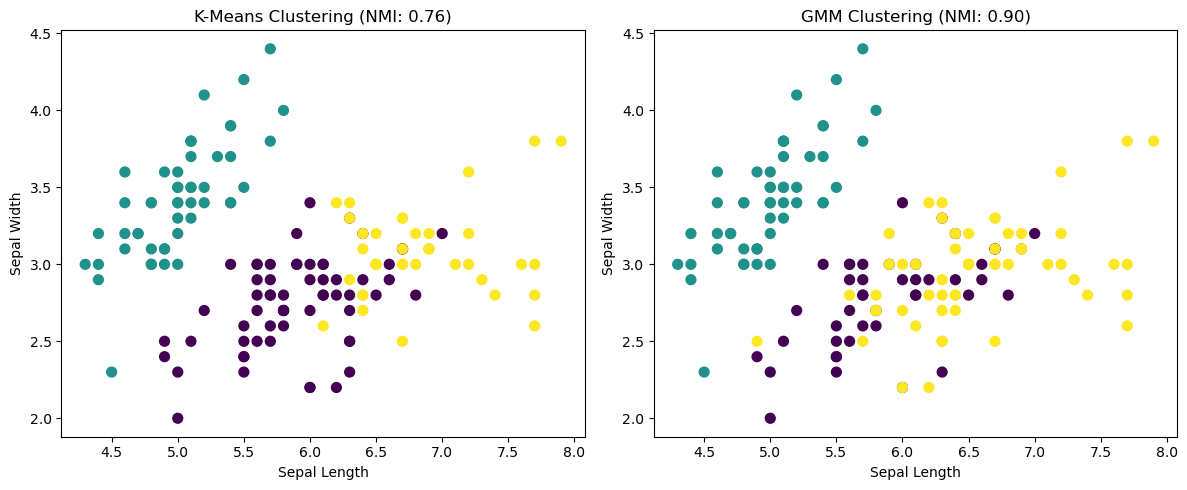

In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import normalized_mutual_info_score
import os

os.environ["OMP_NUM_THREADS"] = "1"

iris = datasets.load_iris()
X = iris.data 
y_true = iris.target 

print("Features:", iris.feature_names)

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.labels_

nmi_kmeans = normalized_mutual_info_score(y_true, y_kmeans)

print(f"\nK-Means:")
print(f"Normalized Mutual Information Score: {nmi_kmeans:.4f}")

gmm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm.fit(X)
y_gmm = gmm.predict(X)

nmi_gmm = normalized_mutual_info_score(y_true, y_gmm)

print(f"\nGMM:")
print(f"Normalized Mutual Information Score: {nmi_gmm:.4f}")

plt.figure(figsize=(12, 5))

# Plot K-Means
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title(f"K-Means Clustering (NMI: {nmi_kmeans:.2f})")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Plot GMM
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis', s=50)
plt.title(f"GMM Clustering (NMI: {nmi_gmm:.2f})")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()